# Tutorial 3

**Rémy BARBERET
Mélissa BUCZKO
Léo CHARDON
Mathilde CORRADI
Antoine COURCELLE
E5FI groupe 1I**

In [51]:
import numpy as np
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt

## Exercice 1

a)

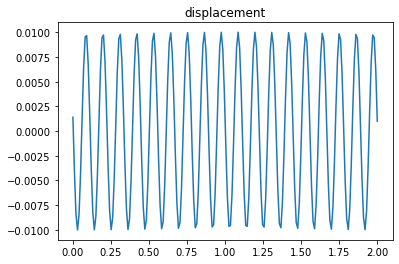

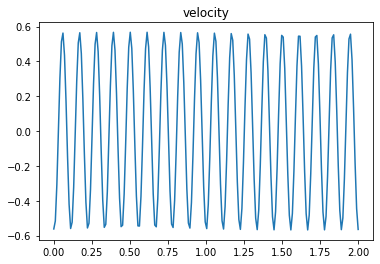

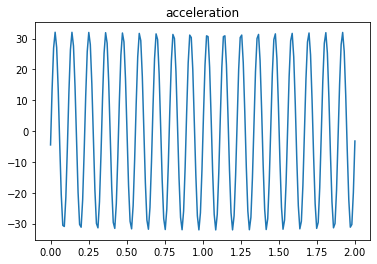

In [52]:
x0 = 0.0001
v0 = 4 * (10 ** -2)
m= 62.5 * (10 ** -3)
k = 200
g = 9.8
w0 = np.sqrt(k/m)
A = np.sqrt(x0 + (v0 / w0)**2 )
phi = np.arctan(v0 / (x0 * w0))
t = np.linspace(0, 2, 2*100)
    
displacement = A * np.cos(w0 * t + phi)
plt.plot(t, displacement)
plt.title("displacement")
plt.show()
velocity = -A * w0 * np.sin(w0 * t + phi)
plt.plot(t, velocity)
plt.title("velocity")
plt.show()
acceleration = -A * (w0 ** 2) * np.cos(w0 * t + phi)
plt.plot(t, acceleration)
plt.title("acceleration")
plt.show()

b)

In [53]:
def free_response(m, k, t, x0 = 0.0001, v0 =  4 * (10 ** -2)):
    w0 = np.sqrt(k/m)
    phi = np.arctan(v0 / (x0 * w0))
    A = np.sqrt(x0 + (v0 / w0)**2 )
    return A * np.cos(w0 * t + phi)
    

In [54]:
displacement_i = free_response(60 * (10 ** -3), 200, t)

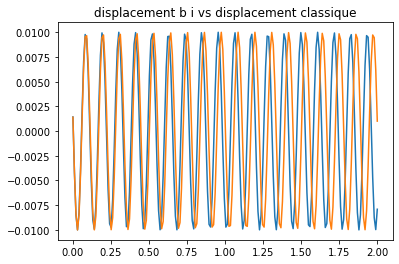

In [55]:
plt.plot(t, displacement_i, t, displacement)
plt.title("displacement b i vs displacement classique")
plt.show()

On observe au fur et à mesure du temps que la masse la plus lourde (62,5) met plus de temps à retourner à son point d'équilibre. (On a en orange la masse la plus lourde)

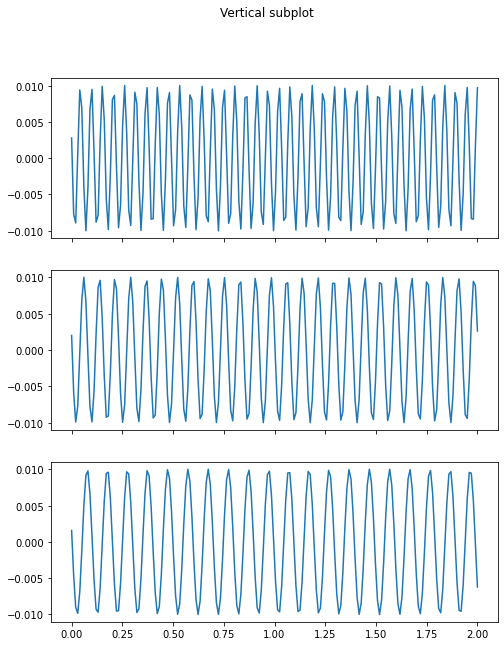

In [56]:
displacement_30 = free_response(30 * (10 ** -3), 400, t)
displacement_60 = free_response(60 * (10 ** -3), 400, t)
displacement_100 = free_response(100 * (10 ** -3), 400, t)

fig, axs = plt.subplots(3, sharex=True, figsize=(8,10))
fig.suptitle('Vertical subplot')
axs[0].plot(t, displacement_30)
axs[1].plot(t, displacement_60)
axs[2].plot(t, displacement_100) 
plt.show()

Plus la masse de l'objet est lourde, plus elle met du temps à accomplir son cycle (une période)

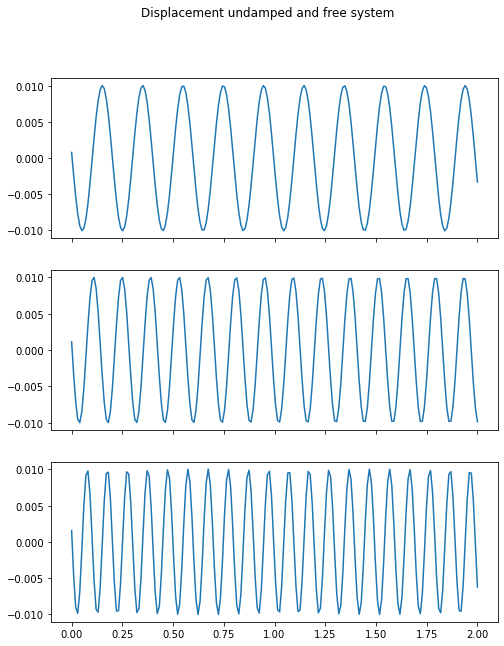

In [57]:
displacement_k100 = free_response(100 * (10 ** -3), 100, t)
displacement_k200 = free_response(100 * (10 ** -3), 200, t)
displacement_k400 = free_response(100 * (10 ** -3), 400, t)

fig, axs = plt.subplots(3, sharex=True, figsize=(8,10))
fig.suptitle('Displacement undamped and free system')
axs[0].plot(t, displacement_k100)
axs[1].plot(t, displacement_k200)
axs[2].plot(t, displacement_k400) 
plt.show()

Plus la variable k est grande, plus la période est courte. L'objet prendra donc moins de temps à accomplir son cycle.

# Exercice 2

a)

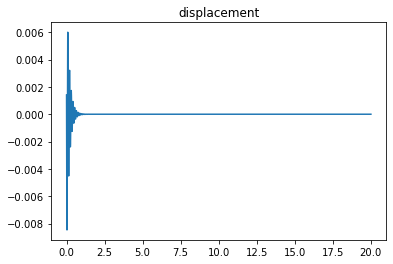

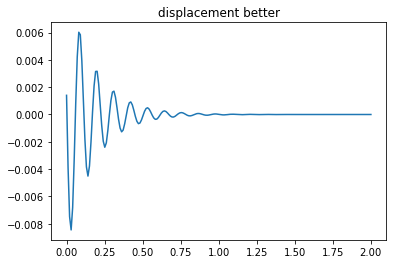

In [58]:
x0 = 0.0001
v0 = 4 * (10 ** -2)
m= 62.5 * (10 ** -3)
k = 200
g = 9.8
xi = 0.1
w0 = np.sqrt(k/m)
wd = np.sqrt(1-(xi**2))* w0
A = np.sqrt(x0 + (v0 / w0)**2 )
phi = np.arctan(v0 / (x0 * w0))
t = np.linspace(0, 20, 20*100)
t_better = np.linspace(0, 2, 2*100)
    
displacement = A * np.exp(-xi* w0 * t) * np.cos(wd * t + phi)
plt.plot(t, displacement)
plt.title("displacement")
plt.show()
displacement_better = A * np.exp(-xi* w0 * t_better) * np.cos(wd * t_better + phi)
plt.plot(t_better, displacement_better)
plt.title("displacement better")
plt.show()
# velocity = -A * w0 * np.sin(w0 * t + phi)
# plt.plot(t, velocity)
# plt.title("velocity")
# plt.show()
# acceleration = -A * (w0 ** 2) * np.cos(w0 * t + phi)
# plt.plot(t, acceleration)
# plt.title("acceleration")
# plt.show()

b)

In [59]:
def free_response_damping(m, k, t, xi, x0 = 0.0001, v0 =  4 * (10 ** -2)):
    w0 = np.sqrt(k/m)
    wd = np.sqrt(1-(xi**2))* w0
    phi = np.arctan(v0 / (x0 * w0))
    A = np.sqrt(x0 + (v0 / w0)**2 )
    return A * np.exp(-xi* w0 * t) * np.cos(wd * t + phi)

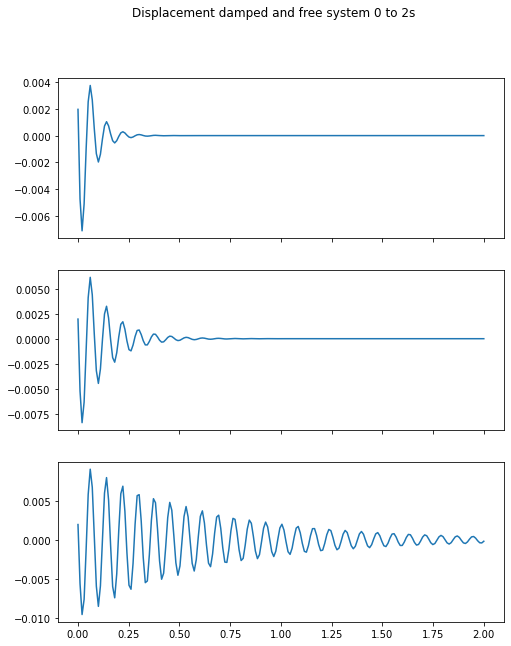

In [60]:
displacement_damped_02 = free_response_damping(m, 400, t_better, 0.2)
displacement_damped_01 = free_response_damping(m, 400, t_better, 0.1)
displacement_damped_002 = free_response_damping(m, 400, t_better, 0.02)

fig, axs = plt.subplots(3, sharex=True, figsize=(8,10))
fig.suptitle('Displacement damped and free system 0 to 2s')
axs[0].plot(t_better, displacement_damped_02)
axs[1].plot(t_better, displacement_damped_01)
axs[2].plot(t_better, displacement_damped_002) 
plt.show()

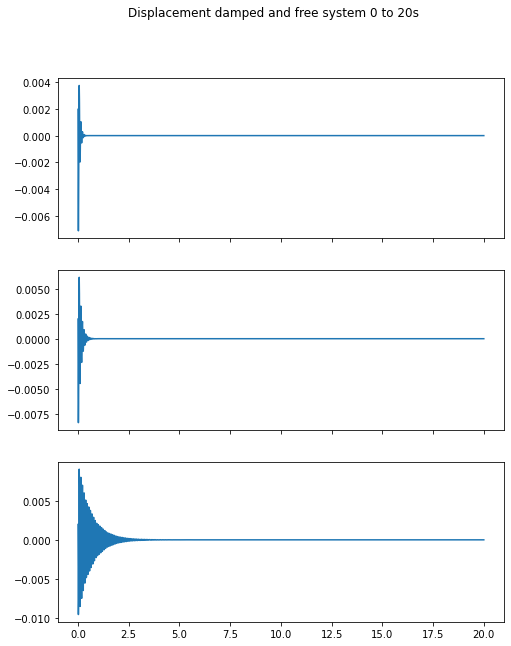

In [61]:
displacement_damped_02 = free_response_damping(m, 400, t, 0.2)
displacement_damped_01 = free_response_damping(m, 400, t, 0.1)
displacement_damped_002 = free_response_damping(m, 400, t, 0.02)

fig, axs = plt.subplots(3, sharex=True, figsize=(8,10))
fig.suptitle('Displacement damped and free system 0 to 20s')
axs[0].plot(t, displacement_damped_02)
axs[1].plot(t, displacement_damped_01)
axs[2].plot(t, displacement_damped_002) 
plt.show()

Plus le coefficient d'amortissement est grand, plus les oscillations sont atténuées rapidement.

# Exercice 3

a)

In [62]:
m = 62.5 * (10 ** -3)
k = 200
g = 9.8
xi = 0.1
w0 = np.sqrt(k/m)
t = np.linspace(0, 2, 2*100)
w = 18
wr = w / w0
phiH = np.arctan((2*xi*wr) / ((wr**2) - 1))
H = (1/k) / np.sqrt(((1-wr)**2)+(2*xi*wr)**2)
phiF = 0
Af = 2

displacement = H * Af * np.cos(w * t + phiF + phiH)

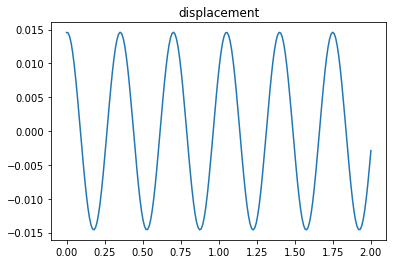

In [63]:
plt.plot(t, displacement)
plt.title("displacement")
plt.show()

b)

In [64]:
def forced_response_damping(m, k, t, xi, F0 = 2, w = 18):
    w0 = np.sqrt(k/m)
    wr = w / w0
    phiH = np.arctan((2*xi*wr) / ((wr**2) - 1))
    H = (1/k) / np.sqrt(((1-wr)**2)+(2*xi*wr)**2)
    phiF = 0
    return H * F0 * np.cos(w * t + phiF + phiH)

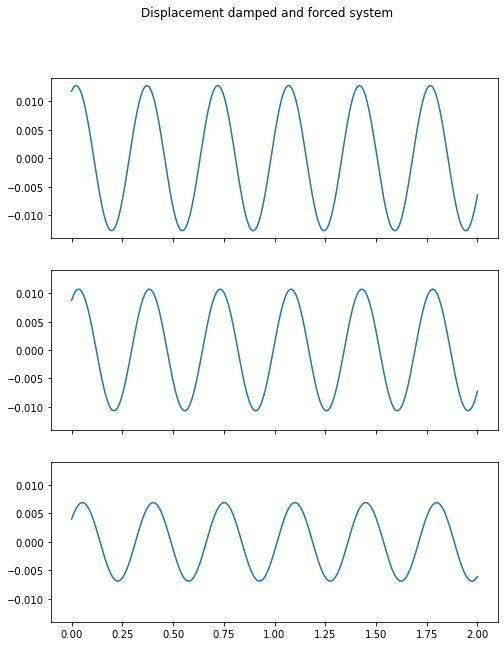

In [65]:
displacement_damped_forced_06 = forced_response_damping(m, 200, t, 0.6)
displacement_damped_forced_1 = forced_response_damping(m, 200, t, 1)
displacement_damped_forced_2 = forced_response_damping(m, 200, t, 2)

fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(8,10))
fig.suptitle('Displacement damped and forced system')
axs[0].plot(t, displacement_damped_forced_06)
axs[1].plot(t, displacement_damped_forced_1)
axs[2].plot(t, displacement_damped_forced_2) 
plt.show()

On remarque que plus le coefficient d'amortissement (damping factor) est élevé et moins l'amplitude du signal est grande.
Cependant, contrairement à l'exercice 2, on applique une force F qui fait que chaque période du signal est identique, l'amplitude ne décroit pas au fur et à mesure du temps.